In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import h5py, os
import struct

import powerbox as pbox

In [2]:
import utils.pluto_utils as pluto
from utils.visualise import *

# output_dir

In [3]:
output_dir = "/home/yangelaxue/Documents/VUW/pluto_runs/HD/Blast/"

# Save plots and movies

In [4]:
save_dir = os.path.join(output_dir,"visualisation")

if not os.path.exists(save_dir):
    os.mkdir(save_dir)

# Load Data

In [19]:
f_names = pluto.get_HDF5names(output_dir)
f_names

['data.0000.dbl.h5',
 'data.0001.dbl.h5',
 'data.0002.dbl.h5',
 'data.0003.dbl.h5',
 'data.0004.dbl.h5',
 'data.0005.dbl.h5',
 'data.0006.dbl.h5',
 'data.0007.dbl.h5',
 'data.0008.dbl.h5',
 'data.0009.dbl.h5',
 'data.0010.dbl.h5',
 'data.0011.dbl.h5',
 'data.0012.dbl.h5',
 'data.0013.dbl.h5',
 'data.0014.dbl.h5',
 'data.0015.dbl.h5',
 'data.0016.dbl.h5',
 'data.0017.dbl.h5',
 'data.0018.dbl.h5',
 'data.0019.dbl.h5',
 'data.0020.dbl.h5',
 'data.0021.dbl.h5',
 'data.0022.dbl.h5',
 'data.0023.dbl.h5',
 'data.0024.dbl.h5',
 'data.0025.dbl.h5',
 'data.0026.dbl.h5',
 'data.0027.dbl.h5',
 'data.0028.dbl.h5',
 'data.0029.dbl.h5',
 'data.0030.dbl.h5',
 'data.0031.dbl.h5',
 'data.0032.dbl.h5',
 'data.0033.dbl.h5',
 'data.0034.dbl.h5',
 'data.0035.dbl.h5',
 'data.0036.dbl.h5',
 'data.0037.dbl.h5',
 'data.0038.dbl.h5',
 'data.0039.dbl.h5',
 'data.0040.dbl.h5',
 'data.0041.dbl.h5',
 'data.0042.dbl.h5',
 'data.0043.dbl.h5',
 'data.0044.dbl.h5',
 'data.0045.dbl.h5',
 'data.0046.dbl.h5',
 'data.0047.d

In [26]:
f_names[[i for i in range(10)]]

TypeError: list indices must be integers or slices, not list

In [6]:
X, Y, Z = pluto.load_HDF5data(os.path.join(output_dir,f_names[0]), 'X', 'Y', 'Z')

In [9]:
rho = np.array([pluto.load_HDF5data(os.path.join(output_dir,f_name), 'rho')[0] for f_name in f_names])
vx1 = np.array([pluto.load_HDF5data(os.path.join(output_dir,f_name), 'vx1')[0] for f_name in f_names])
vx2 = np.array([pluto.load_HDF5data(os.path.join(output_dir,f_name), 'vx2')[0] for f_name in f_names])
try:
    vx3 = np.array([pluto.load_HDF5data(os.path.join(output_dir,f_name), 'vx3')[0] for f_name in f_names])
except:
    print("Variable vx3 does not exist.")

prs = np.array([pluto.load_HDF5data(os.path.join(output_dir,f_name), 'prs')[0] for f_name in f_names])

    
# vx3 = np.array([pluto.load_HDF5data(os.path.join(output_dir,f_name), 'vx3')[0] for f_name in f_names])
# Bx1 = np.array([pluto.load_HDF5data(os.path.join(output_dir,f_name), 'Bx1')[0] for f_name in f_names])
# Bx2 = np.array([pluto.load_HDF5data(os.path.join(output_dir,f_name), 'Bx2')[0] for f_name in f_names])
# Bx3 = np.array([pluto.load_HDF5data(os.path.join(output_dir,f_name), 'Bx3')[0] for f_name in f_names])
# v = np.array([vx1, vx2, vx3])
# B = np.array([Bx1, Bx2, Bx3])

times = pluto.get_times(output_dir)

Variable vx3 does not exist.


In [21]:
times

array([0.        , 0.01819434, 0.03640434, 0.05924007, 0.07917953,
       0.09601723, 0.1163909 , 0.1281299 , 0.1552472 , 0.1706773 ,
       0.1997131 , 0.2134441 , 0.2268408 , 0.2529114 , 0.2777299 ,
       0.2899091 , 0.3137677 , 0.335873  , 0.3575767 , 0.3794724 ])

In [9]:
v_list = [(_vx1**2 + _vx2**2 + _vx3**2)**.5 for _vx1,_vx2,_vx3 in zip(vx1,vx2,vx3)]

NameError: name 'vx3' is not defined

# Plots

In [22]:
def get_list2D(var_list,dim=0):
    return [_var[dim] for _var in var_list] if var_list[0].ndim==3 else var_list

In [23]:
XY = (X[0],Y[0]) if X.ndim==3 else (X,Y)
X, Y = XY

In [24]:
vx2[0].shape

(256, 256)

# View Slices

# Animate Plots

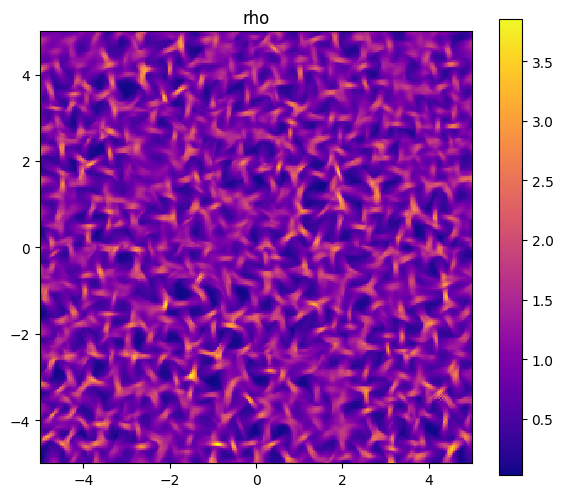

In [29]:
var_name = 'rho'

_var_list = get_list2D(rho,128)
vmin, vmax = np.min(_var_list), np.max(_var_list)
# vmax = np.max(np.abs(_var_list))
# vmin = -vmax

animate_vars(_var_list,save_dir=os.path.join(save_dir,f'{var_name}.mp4'),title=f'{var_name}',
             XY=(X,Y),
            vmin=vmin,vmax=vmax,
            cmap='plasma'
            )

/home/yangelaxue/clusters/lib/python3.12/site-packages/matplotlib/quiver.py:695: RuntimeWarning: divide by zero encountered in scalar divide
  length = a * (widthu_per_lenu / (self.scale * self.width))
/home/yangelaxue/clusters/lib/python3.12/site-packages/matplotlib/quiver.py:695: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


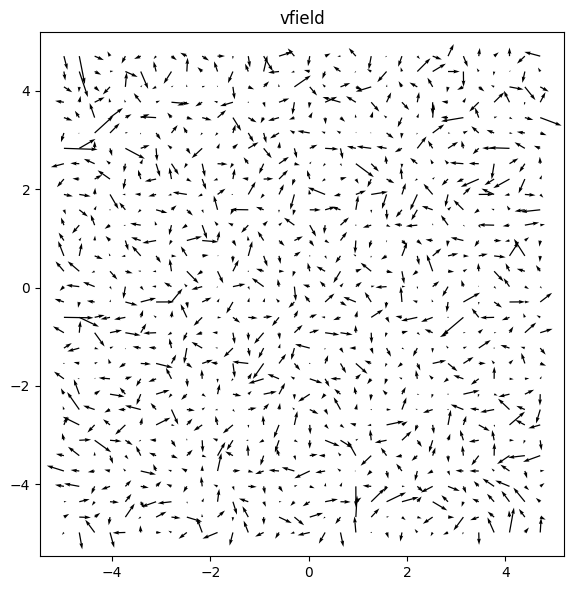

In [20]:
_vx1 = get_list2D(vx1,128)
_vx2 = get_list2D(vx2,128)

animate_vfield(_vx1,_vx2,save_dir=os.path.join(save_dir,'vfield.mp4'),title='vfield',
               XY=(X,Y),
               intv=8,
              )

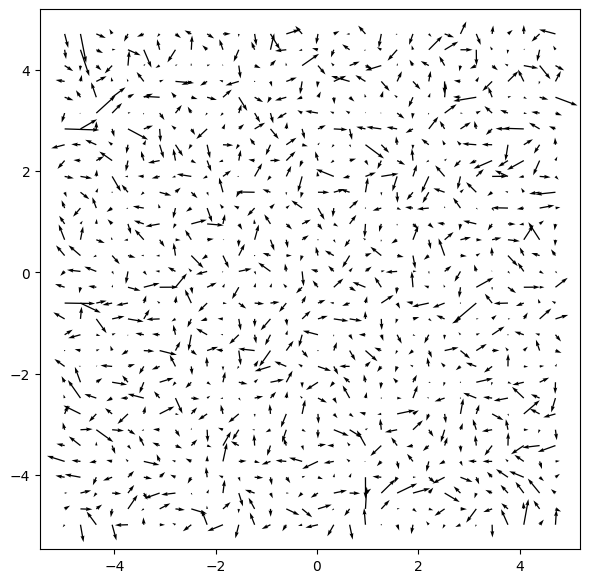

In [19]:
intv = 8
i = 10

fig, ax = plt.subplots(1,1,figsize=(6,6),tight_layout=True)

ax.set_aspect('equal')

ax.quiver(X[::intv,::intv], Y[::intv,::intv], _vx1[i][::intv,::intv] ,_vx2[i][::intv,::intv])

In [63]:
def animate_vstream(vx1_list, vx2_list, **_kwargs):

    kwargs = {
        'title' : None,
        'XY' : None,
        'intv' : 4,
        'figsize' : (6,6),
        'save_dir' : "./movie.mp4",
    }
    kwargs.update(_kwargs)

    title = kwargs['title']
    XY = kwargs['XY']
    if XY:
        X, Y = XY
    else:
        X, Y = np.meshgrid(np.arange(0,vx1_list[0].shape[0]), np.arange(0,vx1_list[0].shape[1]), indexing='xy')
    figsize = kwargs['figsize']
    save_dir = kwargs['save_dir']
    
    fig, ax = plt.subplots(1,1,figsize=figsize,tight_layout=True)
    
    ax.set_title(f"{title}")
    ax.set_aspect('equal')
    ax.set_xlim(X.min(),X.max())
    ax.set_ylim(Y.min(),Y.max())

    stream = ax.streamplot(X,Y,vx1_list[0], vx2_list[0], density=2, linewidth=1.)

    def animate(i):
        # ax.collections = [] # clear lines streamplot
        # ax.patches = [] # clear arrowheads streamplot
        # dy = -1 + iter * 0.01 + Y**2
        # dx = np.ones(dy.shape)
        # dyu = dy / np.sqrt(dy**2 + dx**2)
        # dxu = dx / np.sqrt(dy**2 + dx**2)
        stream = ax.streamplot(X,Y,vx1_list[i], vx2_list[i], density=2,arrowsize=1, linewidth=1.)
        print(i)
        return stream
    
    # ims = []
    # for i in range(len(vx1_list)):
    #     im = ax.streamplot(X, Y, vx1_list[i] ,vx2_list[i])
    #     ims.append([im])
    
    ani = animation.FuncAnimation(fig, animate, interval=300)
    ani.save(save_dir,dpi=150)

In [64]:
animate_vstream(_vx1_list,_vx2_list,save_dir=os.path.join(save_dir,'vstream.mp4'),title='vstream',
                XY=(X,Y),
               )

/tmp/ipykernel_8251/1508019007.py:46: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = animation.FuncAnimation(fig, animate, interval=300)


0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7cb81e16ce00> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7cb7db5bf4c0> (for post_execute), with arguments args (),kwargs {}:



KeyboardInterrupt



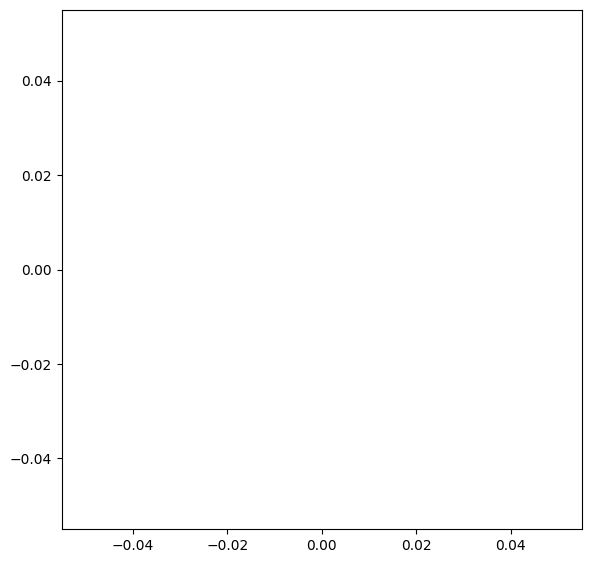

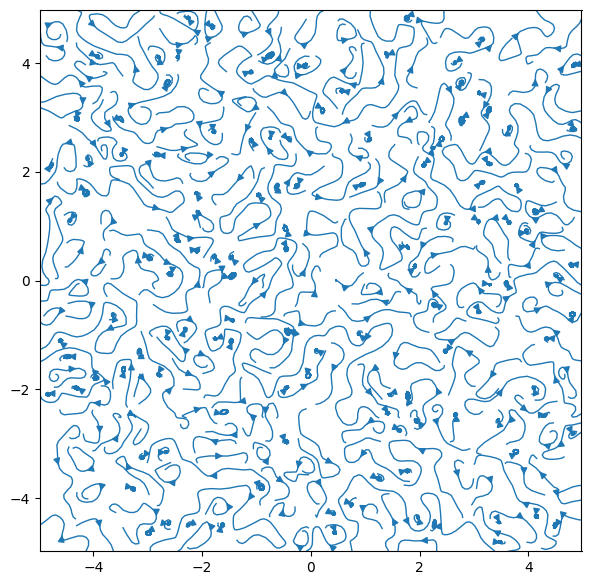

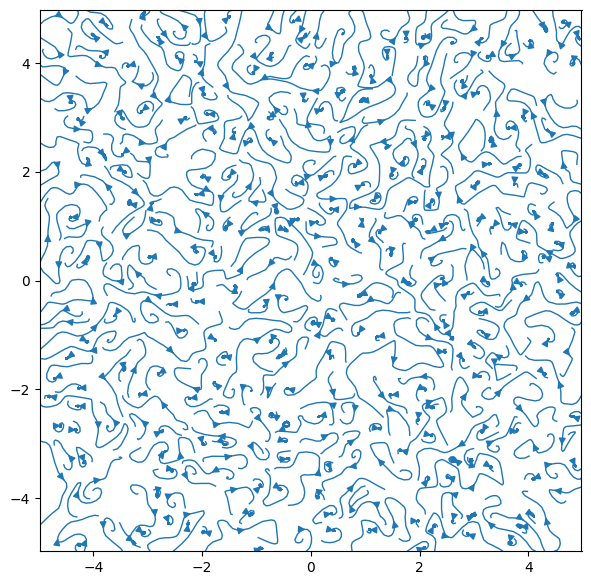

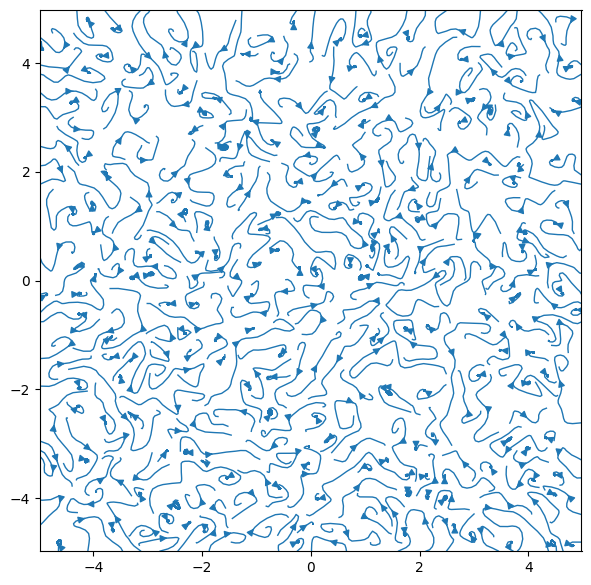

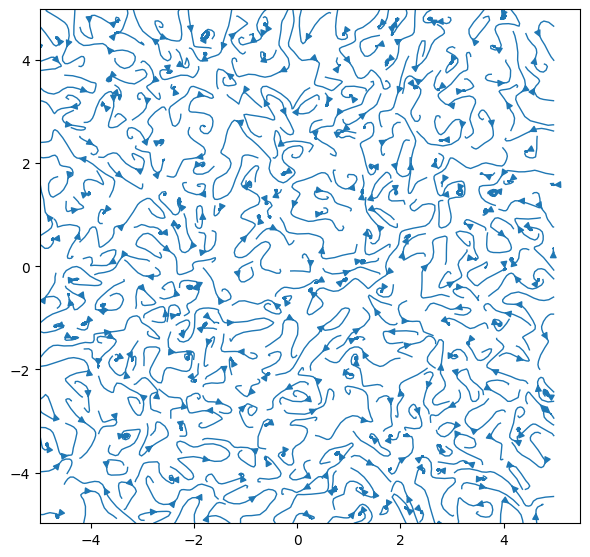

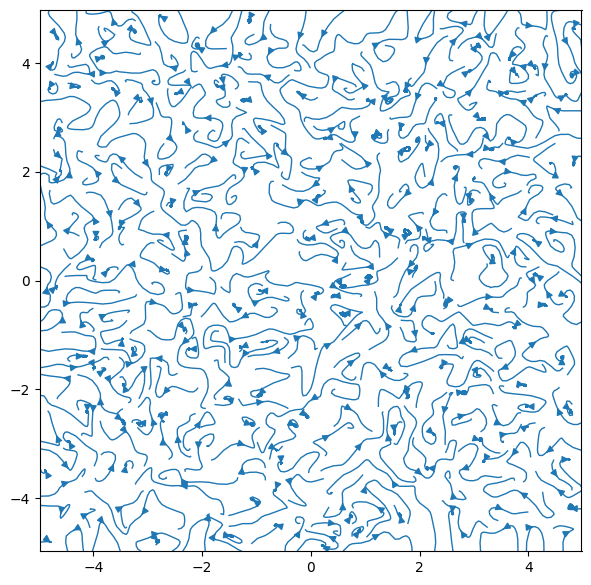

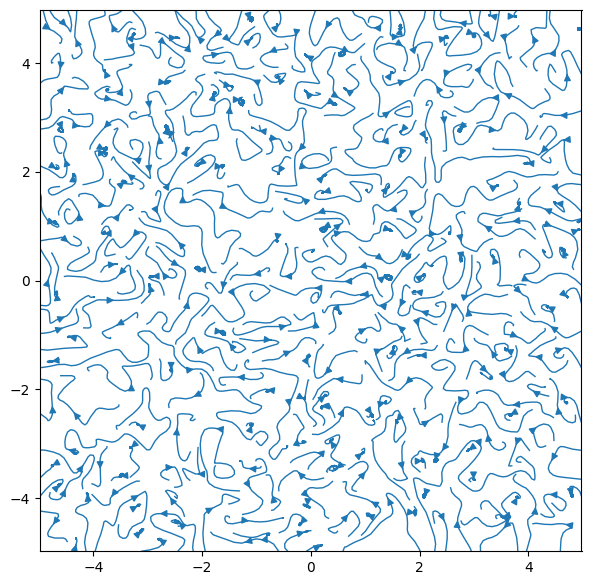

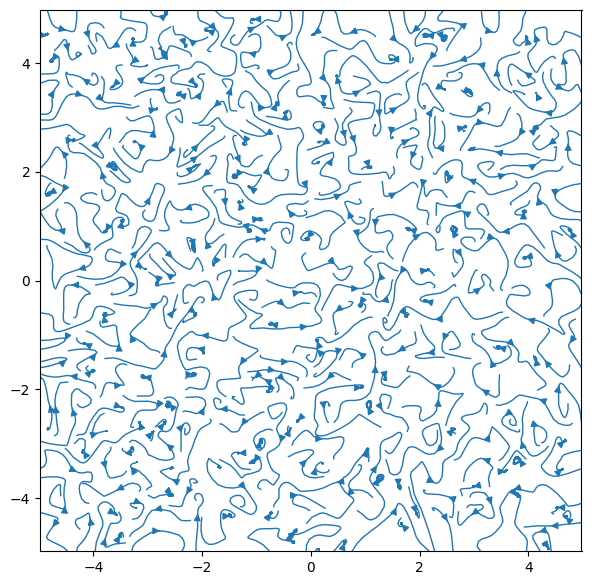

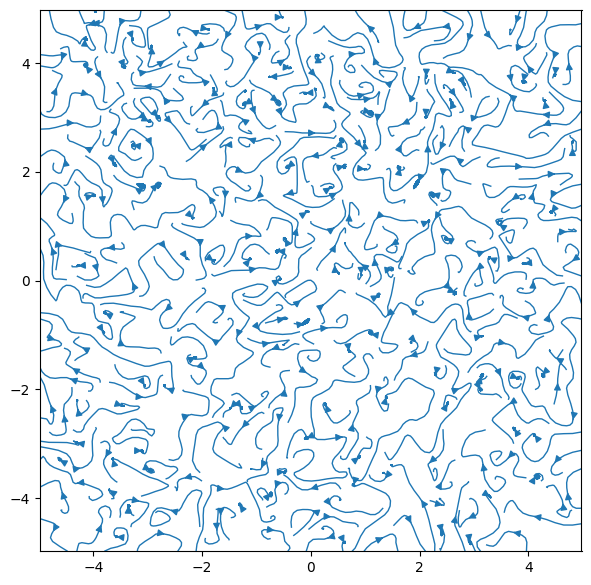

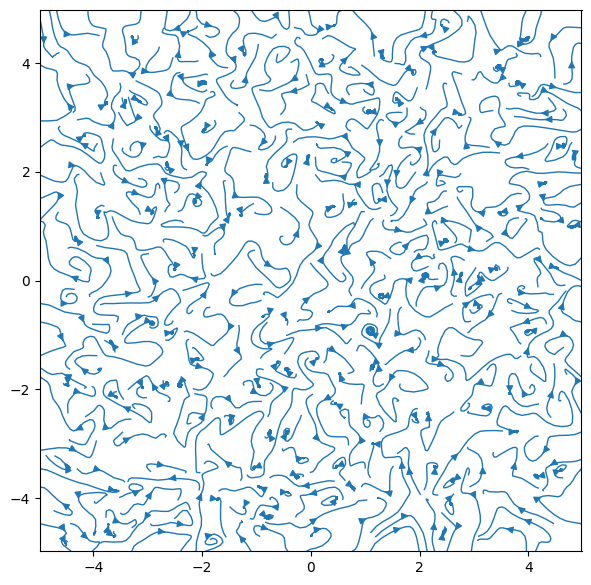

In [23]:
intv = 1
i = 10

for i in range(0,10):

    fig, ax = plt.subplots(1,1,figsize=(6,6),tight_layout=True)
    
    ax.set_aspect('equal')
    # ax.set_xlim(-.5,.5)
    # ax.set_ylim(-.5,.5)
    
    ax.streamplot(X[::intv,::intv], Y[::intv,::intv], _vx1[i][::intv,::intv] ,_vx2[i][::intv,::intv],
                 density=2., linewidth=1
                 )
    plt.show()

In [25]:
v_list[0].shape

(256, 256)

In [23]:
vx1_list[0].shape

(256, 256)

In [29]:
2*np.pi/1, 2*np.pi/(1/256)

(6.283185307179586, 1608.495438637974)

In [41]:
130*2*np.pi/1, 2*np.pi/(1/256)

(816.8140899333462, 1608.495438637974)

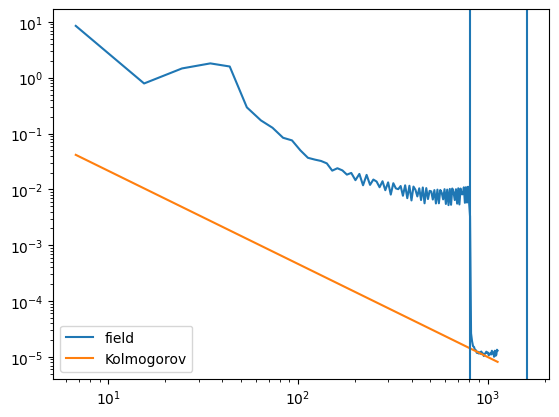

In [45]:
p_k_field, bins_field = pbox.get_power(v_list[0], 1)

fig, ax = plt.subplots()

ax.set_yscale('log')
ax.set_xscale('log')

line, = ax.plot(bins_field, p_k_field*bins_field**2,label='field')
ax.plot(bins_field, bins_field**(-5/3), label="Kolmogorov")

ax.axvline(2*np.pi/(1/256) / 2)
# ax.axvline(2*np.pi/(1/256))

ax.legend()

/home/yangelaxue/clusters/lib/python3.12/site-packages/powerbox/tools.py:261: FutureWarning: In the future, bins will be generated by default up to the smallest length over any dimension, instead of the largest magnitude for the box.Set bins_upto_boxlen to silence this warning.
  bins = _getbins(bins, coord_mags, log_bins, bins_upto_boxlen=bins_upto_boxlen)


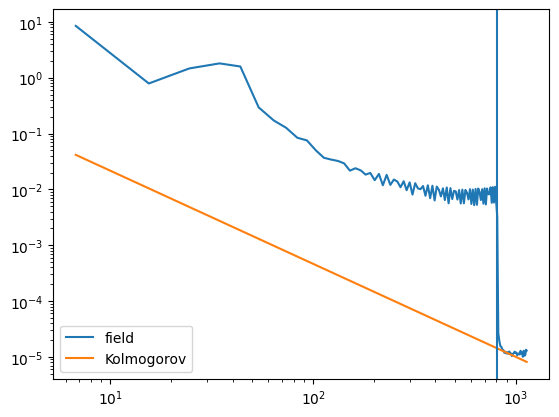

In [44]:
p_k_field, bins_field = pbox.get_power(v_list[0], 1)

fig, ax = plt.subplots()

ax.set_yscale('log')
ax.set_xscale('log')

line, = ax.plot(bins_field, p_k_field*bins_field**2,label='field')
ax.plot(bins_field, bins_field**(-5/3), label="Kolmogorov")

ax.axvline(2*np.pi/(1/256) / 2)

ax.legend()

def animate_power_spectrum(i):
    p_k_field_line = pbox.get_power(v_list[i], 1)[0]
    line.set_ydata(p_k_field_line*bins_field**2)  # update the data.
    return line,


ani = animation.FuncAnimation(fig, animate_power_spectrum, interval=len(rho_list),save_count=len(rho_list))

# To save the animation, use e.g.
#
ani.save(os.path.join(save_dir,'power spectrum.mp4'),dpi=150)
    
# plt.plot(bins_field, p_k_field)



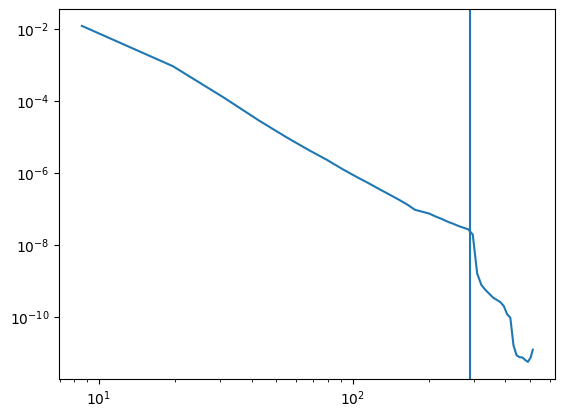

In [32]:
p_k_field_line = pbox.get_power(rho_list[100], 1)[0]

plt.plot(bins_field, p_k_field_line)
plt.axvline(290)

plt.yscale('log')
plt.xscale('log')

In [33]:
L=2*np.pi/290

L, 4/96

(0.021666156231653747, 0.041666666666666664)

(0.020943951023931952, 0.041666666666666664)

In [ ]:
plt.pcolormesh(X, Y, rho, cmap='magma')
plt.colorbar()

plt.gca().set_aspect(1)

In [ ]:
kvec, Bx1_fft = modal_spectrum(Bx1, lenn=[2*np.pi,2*np.pi])

In [ ]:
Bx1_fft.shape

In [ ]:
plt.pcolormesh(kvec[0], kvec[1], Bx1_fft.real, cmap='magma')
plt.colorbar()

plt.gca().set_aspect(1)

In [ ]:
kvec

In [14]:
from utils import reynolds
from utils.differentiation_utils import gradient_FT, gradient_discrete

In [43]:
ux1 = reynolds.get_fluctuations(vx1_list,times)
ux2 = reynolds.get_fluctuations(vx2_list,times)

# _Ux1 = reynolds.get_timeaverage(ux1,times)
# _Ux2 = reynolds.get_timeaverage(ux2,times)
# assert np.isclose(_Ux1,np.zeros_like(_Ux1)).all()
# assert np.isclose(_Ux2,np.zeros_like(_Ux2)).all()

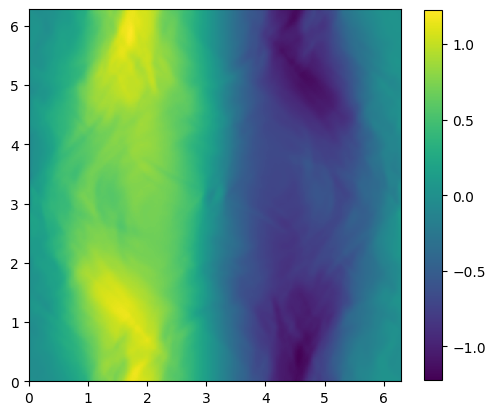

In [44]:
fig, ax = plt.subplots(1,1,figsize=(6,6))

ax.set_aspect("equal")

im = ax.pcolormesh(X,Y,ux2[0])

fig.colorbar(im,shrink=.8)

In [15]:
if X.ndim==3:
    dxdydz = ((X.max()-X.min())/X.shape[0],(Y.max()-Y.min())/Y.shape[1],(Z.max()-Z.min())/Z.shape[2])
else:
    dxdydz = ((X.max()-X.min())/X.shape[0],(Y.max()-Y.min())/Y.shape[1])

In [45]:
timeslice = 100

In [46]:
stress = reynolds.get_stress(prs_list[timeslice],0,vx1_list[timeslice],vx2_list[timeslice],dxdydz=dxdydz)

In [47]:
strain  = reynolds.get_strain(vx1_list[timeslice],vx2_list[timeslice],dxdydz=dxdydz)

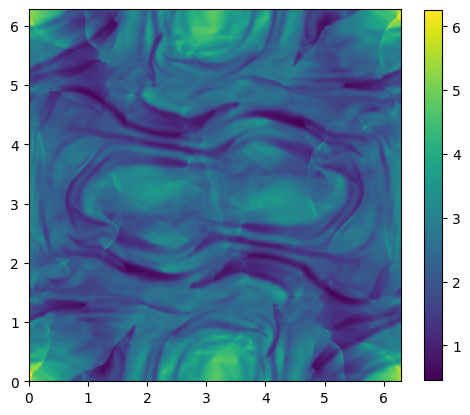

In [61]:
fig, ax = plt.subplots(1,1,figsize=(6,6))

ax.set_aspect("equal")

# im = ax.pcolormesh(X,Y,gradients[0][1]+gradients[1][0])
# im = ax.pcolormesh(X,Y,strain[1][0])
im = ax.pcolormesh(X,Y,prs_list[timeslice])

fig.colorbar(im,shrink=.8)

In [51]:
gradients = []
v = [vx1_list[timeslice],vx2_list[timeslice]]
for _v in v:
    grad = gradient_FT(_v,dxdydz)
    gradients.append(grad)

In [60]:
prs

NameError: name 'prs' is not defined

In [30]:
stress

array([[[[-1.66666667, -1.66666667, -1.66666667, ..., -1.66666667,
          -1.66666667, -1.66666667],
         [-1.66666667, -1.66666667, -1.66666667, ..., -1.66666667,
          -1.66666667, -1.66666667],
         [-1.66666667, -1.66666667, -1.66666667, ..., -1.66666667,
          -1.66666667, -1.66666667],
         ...,
         [-1.66666667, -1.66666667, -1.66666667, ..., -1.66666667,
          -1.66666667, -1.66666667],
         [-1.66666667, -1.66666667, -1.66666667, ..., -1.66666667,
          -1.66666667, -1.66666667],
         [-1.66666667, -1.66666667, -1.66666667, ..., -1.66666667,
          -1.66666667, -1.66666667]],

        [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         ...,
         [ 0.        ,  0.        